In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive
drive.mount('/drive')

plt.style.use('fivethirtyeight')

Mounted at /drive


In [ ]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/file/d/1yFcNXwsPXSnBD7ST1rLA40fT8keWGZb0/view?usp=sharing' #The Sharable Link

id = '1yFcNXwsPXSnBD7ST1rLA40fT8keWGZb0'


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('BTC_USD_MINUTE.csv')  
BTC_USD = pd.read_csv('BTC_USD_MINUTE.csv', skiprows=1)

1yFcNXwsPXSnBD7ST1rLA40fT8keWGZb0


In [ ]:
#Importing Data
#from google.colab import files
#uploaded = files.upload()

BTC_USD


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1611273960000,2021-01-22 00:06:00,BTC/USDT,30500.27,30627.33,30500.27,30610.46,73.479652,2.246960e+06,2051
1,1611273900000,2021-01-22 00:05:00,BTC/USDT,30460.66,30577.06,30358.00,30500.28,165.010272,5.025780e+06,3380
2,1611273840000,2021-01-22 00:04:00,BTC/USDT,30470.34,30495.45,30368.42,30460.53,221.346530,6.733057e+06,3203
3,1611273780000,2021-01-22 00:03:00,BTC/USDT,30622.58,30633.94,30420.00,30471.41,312.639545,9.545904e+06,4530
4,1611273720000,2021-01-22 00:02:00,BTC/USDT,30572.18,30839.61,30572.18,30623.00,194.105609,5.961204e+06,4108
...,...,...,...,...,...,...,...,...,...,...
189932,1599857040000,2020-09-11 20:44:00,BTC/USDT,10318.99,10319.72,10316.58,10319.47,14.466964,1.492667e+05,284
189933,1599856980000,2020-09-11 20:43:00,BTC/USDT,10319.34,10320.14,10318.89,10319.00,13.548103,1.398070e+05,187
189934,1599856920000,2020-09-11 20:42:00,BTC/USDT,10319.50,10320.31,10318.49,10319.34,12.123487,1.251089e+05,193
189935,1599856860000,2020-09-11 20:41:00,BTC/USDT,10316.00,10321.09,10316.00,10319.50,16.328427,1.684977e+05,256


In [ ]:

BTC_USD = BTC_USD[7:-200]

BTC_USD


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
14,1611273120000,2021-01-21 23:52:00,BTC/USDT,30905.04,30955.79,30800.00,30891.02,130.993132,4.046402e+06,1920
15,1611273060000,2021-01-21 23:51:00,BTC/USDT,30988.39,30998.12,30828.73,30911.09,115.820068,3.578935e+06,2847
16,1611273000000,2021-01-21 23:50:00,BTC/USDT,31129.70,31133.27,30948.72,30988.39,124.379711,3.857641e+06,2534
17,1611272940000,2021-01-21 23:49:00,BTC/USDT,31182.85,31182.86,31101.19,31129.25,31.626050,9.850036e+05,948
18,1611272880000,2021-01-21 23:48:00,BTC/USDT,31153.50,31265.30,31153.50,31180.00,37.590723,1.173734e+06,1144
...,...,...,...,...,...,...,...,...,...,...
189532,1599881040000,2020-09-12 03:24:00,BTC/USDT,10342.00,10346.68,10341.99,10346.67,9.275397,9.594046e+04,204
189533,1599880980000,2020-09-12 03:23:00,BTC/USDT,10340.68,10342.00,10340.67,10341.99,4.863641,5.029828e+04,121
189534,1599880920000,2020-09-12 03:22:00,BTC/USDT,10338.47,10342.31,10336.63,10340.67,7.609907,7.867907e+04,198
189535,1599880860000,2020-09-12 03:21:00,BTC/USDT,10331.45,10341.20,10331.14,10338.46,16.229532,1.677834e+05,340


In [ ]:
def buy_sell_PC(data, buyBoundary, sellBoundary):
  # Buys and sells depending on whether the rate of change of the price is 
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  buySellList = []

  for i in range(len(data)):
    if data['rateOfChange'][i] > buyBoundary and flag != 1:
      sigPriceBuy.append(data['closePrice'][i])
      sigPriceSell.append(np.nan)
      buySellList.append(data['closePrice'][i])
      flag = 1
    elif data['rateOfChange'][i] < -sellBoundary and flag != 0 and flag != -1:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['closePrice'][i])
      buySellList.append(data['closePrice'][i])
      flag = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell, buySellList)


def buy_sell_DA(data, buyPerc, sellPerc):
  #Buys and Sells depending on price crossing a certain percentage under and over the 24 Hour average.
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  buySellList = []

  for i in range(len(data)):
    if (data['dayAverage'][i]*(1 - buyPerc)) > (data['closePrice'][i]) and flag != 1:
      sigPriceBuy.append(data['closePrice'][i])
      sigPriceSell.append(np.nan)
      buySellList.append(data['closePrice'][i])
      flag = 1
    elif data['dayAverage'][i]*(1 + sellPerc) < data['closePrice'][i] and flag != 0 and flag != -1:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['closePrice'][i])
      buySellList.append(data['closePrice'][i])
      flag = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell, buySellList)




def buy_sell_MA(data):
  #Buys and sells depending on the short and long moving averages crossing.
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  buySellList = []

  for i in range(len(data)):
    if data['MA_Short'][i] > data['MA_Long'][i] and flag != 1:
      sigPriceBuy.append(data['closePrice'][i])
      sigPriceSell.append(np.nan)
      buySellList.append(data['closePrice'][i])
      flag = 1
    elif data['MA_Short'][i] < data['MA_Long'][i] and flag != 0 and flag != -1:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['closePrice'][i])
      buySellList.append(data['closePrice'][i])
      flag = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell, buySellList)





def visualize():
  
  #Visualizing the Data
  plt.figure(figsize=(14.5, 6))
  plt.plot(Curr_Day['close'], label='BTC-USD', alpha=0.4)
  plt.plot(MA_Short, label='MA Short', alpha=0.4)
  plt.plot(MA_Long, label='MA Long', alpha=0.4)
  
  plt.scatter(Data.index, Data['buySignalPrice'], label='Buy Price', marker='^', color='green', s=60)
  plt.scatter(Data.index, Data['sellSignalPrice'], label='Sell Price', marker='^', color='red', s=60)
  plt.title('BTC to USD for One day')
  plt.xlabel('Time')
  plt.ylabel('US $')
  plt.legend(loc='upper left')


  plt.figure(figsize=(14.5, 6))
  plt.plot(rateOfChange, label='Rate of Change')
  plt.title('BTC to USD for One day')
  plt.xlabel('Time')
  plt.ylabel('US $')
  plt.legend(loc='upper left')






balanceOptim = [[],[],[]]

Short = 25
Long = 100


#Creating and organizing the datasets.
Curr_Day = pd.DataFrame()

Curr_Day['close'] = BTC_USD['close']
 
#Curr_Day =  Curr_Day[::-1]
#Curr_Day = Curr_Day[:-80000]

#Preprocesses the data and creates additional columns of values required for the different strategies.

Curr_Day.reset_index(inplace=True)
dayAverage = Curr_Day['close'].rolling(window=1439).mean()
MA_Short = Curr_Day['close'].rolling(window=Short).mean()
MA_Long = Curr_Day['close'].rolling(window=Long).mean()
rateOfChange = Curr_Day['close'].pct_change().rolling(window=15).mean()

Data = pd.DataFrame()

Data['closePrice'] = Curr_Day['close']
Data['MA_Short'] = MA_Short
Data['MA_Long'] = MA_Long
Data['rateOfChange'] =rateOfChange
Data['dayAverage'] = dayAverage


#visualize()

#Runs through different values for buy percentage and sell percentage and simulates the buy_sell_DA Strategy.
for i in range(5, 20):

  buyPerc = 0.01 * i
  buyBoundary = 0.00005

  for j in range(4, 10):

    sellPerc = 0.02*j
    sellBoundary = 0.00005

    Balance = 1000







    buySell = buy_sell_DA(Data, buyPerc, sellPerc)

    Data['buySignalPrice'] = buySell[0]
    Data['sellSignalPrice'] = buySell[1]

    buySellList = buySell[2]


    Stocks = 0
    #if len(buyList) > len(sellList):
      #sellList.append(Data['closePrice'][1439])

    for i in range(1, len(buySellList)+1):
      if i%2 != 0:
        Stocks = Balance/buySellList[i-1]
      elif i%2 == 0:
        Balance = Stocks*buySellList[i-1]

    #print(Balance, buyPerc, sellPerc)

    balanceOptim[0].append(Balance)
    balanceOptim[1].append(buyPerc)
    balanceOptim[2].append(sellPerc)

    #visualize()



  #Visualizing the Data


  #plt.show








1258.2839260085848


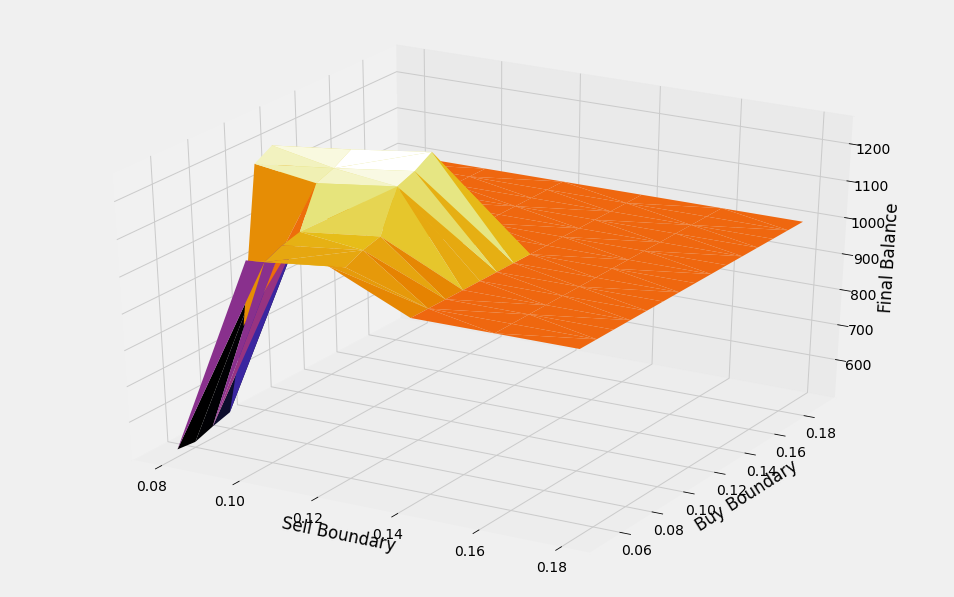

In [ ]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(111, projection='3d')



print(max(balanceOptim[0]))

ax.plot_trisurf(np.array(balanceOptim[2]), np.array(balanceOptim[1]), np.array(balanceOptim[0]), cmap='CMRmap')

ax.set_xlabel('Sell Boundary')
ax.set_ylabel('Buy Boundary')
ax.set_zlabel('Final Balance')

plt.show()

In [ ]:
maxValues = [[0.00085, 0.0002], [0.00085, 0.00025], [0.00085, 0.0003], [0.00085, 0.00035], [0.00085, 0.0004]]